In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


Завантажимо і відобразимо датасет **Data_to_Transform.csv**:

In [2]:
df = pd.read_csv('Data_to_Transform.csv')
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Moderate Positive Skew  10000 non-null  float64
 1   Highly Positive Skew    10000 non-null  float64
 2   Moderate Negative Skew  10000 non-null  float64
 3   Highly Negative Skew    10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


array([[<Axes: title={'center': 'Moderate Positive Skew'}>,
        <Axes: title={'center': 'Highly Positive Skew'}>],
       [<Axes: title={'center': 'Moderate Negative Skew'}>,
        <Axes: title={'center': 'Highly Negative Skew'}>]], dtype=object)

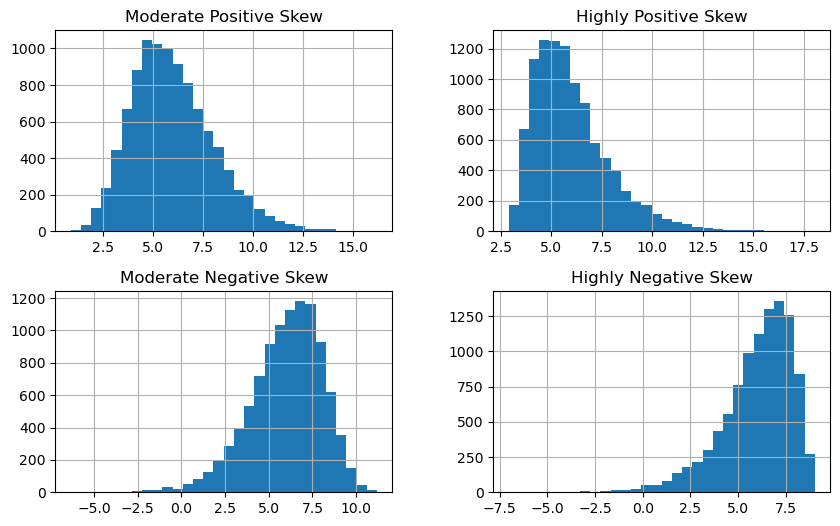

In [4]:
df.hist(figsize=(10, 6), bins=30)

**Moderate Positive Skew:**

In [5]:
data_col1 = np.sqrt(df['Moderate Positive Skew'])

<Axes: xlabel='Moderate Positive Skew', ylabel='Count'>

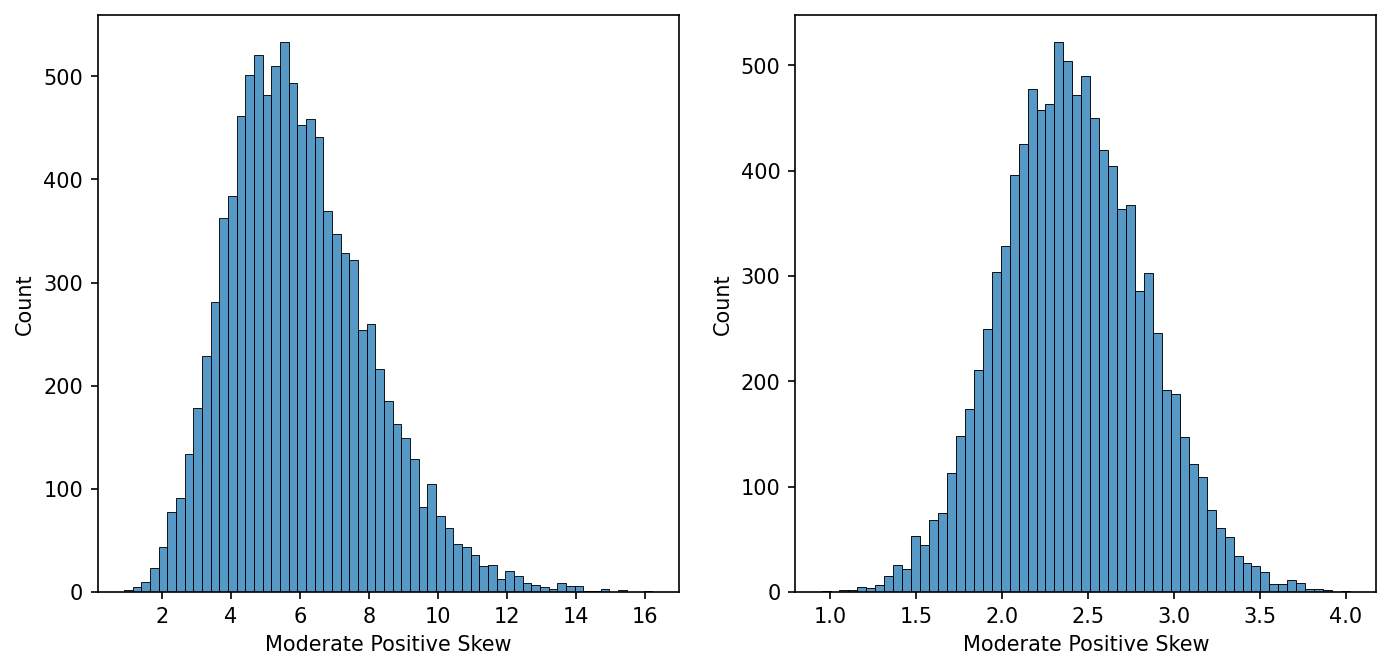

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), dpi= 150)
sns.histplot(df['Moderate Positive Skew'], ax=axes[0])
sns.histplot(data_col1, ax=axes[1])

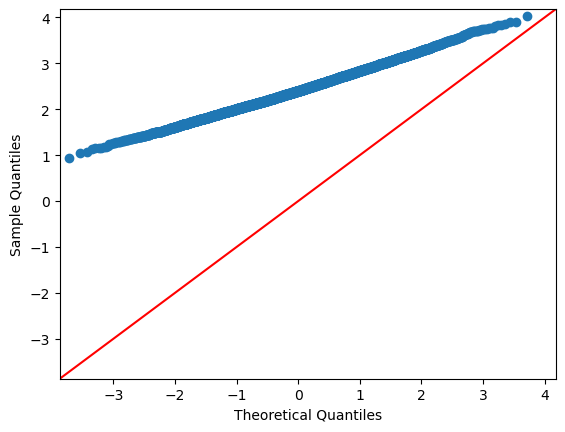

In [7]:
fig = sm.qqplot(data_col1, line='45')
plt.show()

**Highly Positive Skew:**

In [8]:
data_col2 = df['Highly Positive Skew'].values.reshape(-1, 1)
pt = PowerTransformer(method='box-cox')
data_col2 = pt.fit_transform(data_col2)

<Axes: ylabel='Count'>

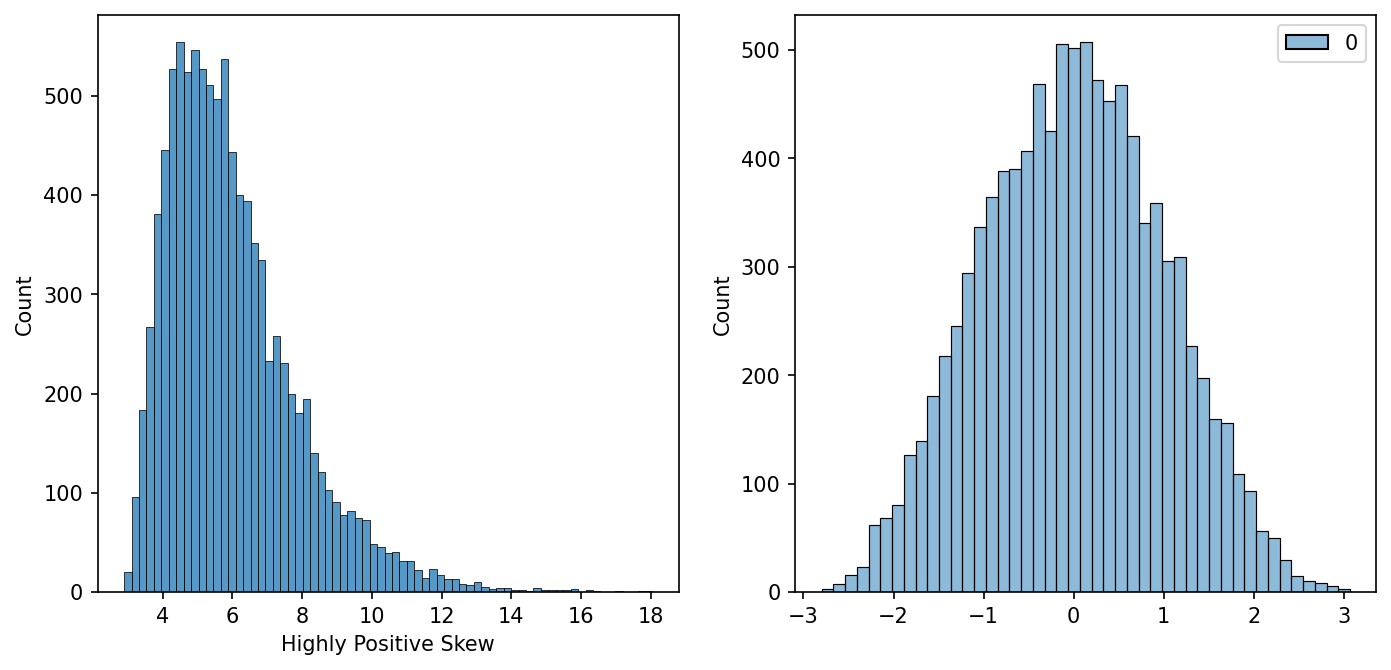

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), dpi= 150)
sns.histplot(df['Highly Positive Skew'], ax=axes[0])
sns.histplot(data_col2, ax=axes[1])

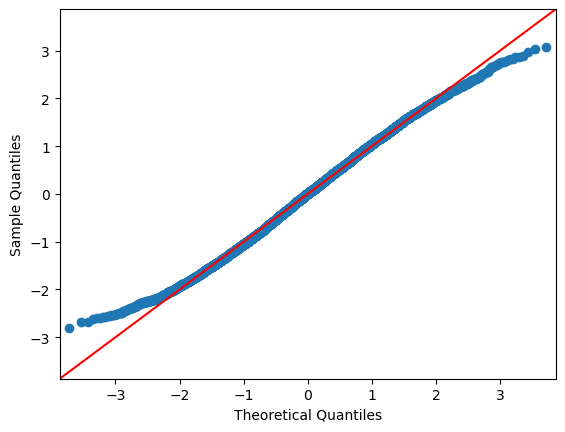

In [10]:
fig = sm.qqplot(data_col2, line='45')
plt.show()

**Moderate Negative Skew:**

In [11]:
data_col3 = df['Moderate Negative Skew'].values.reshape(-1, 1)
pt2 = PowerTransformer(method='yeo-johnson')
data_col3 = pt2.fit_transform(data_col3)

<Axes: ylabel='Count'>

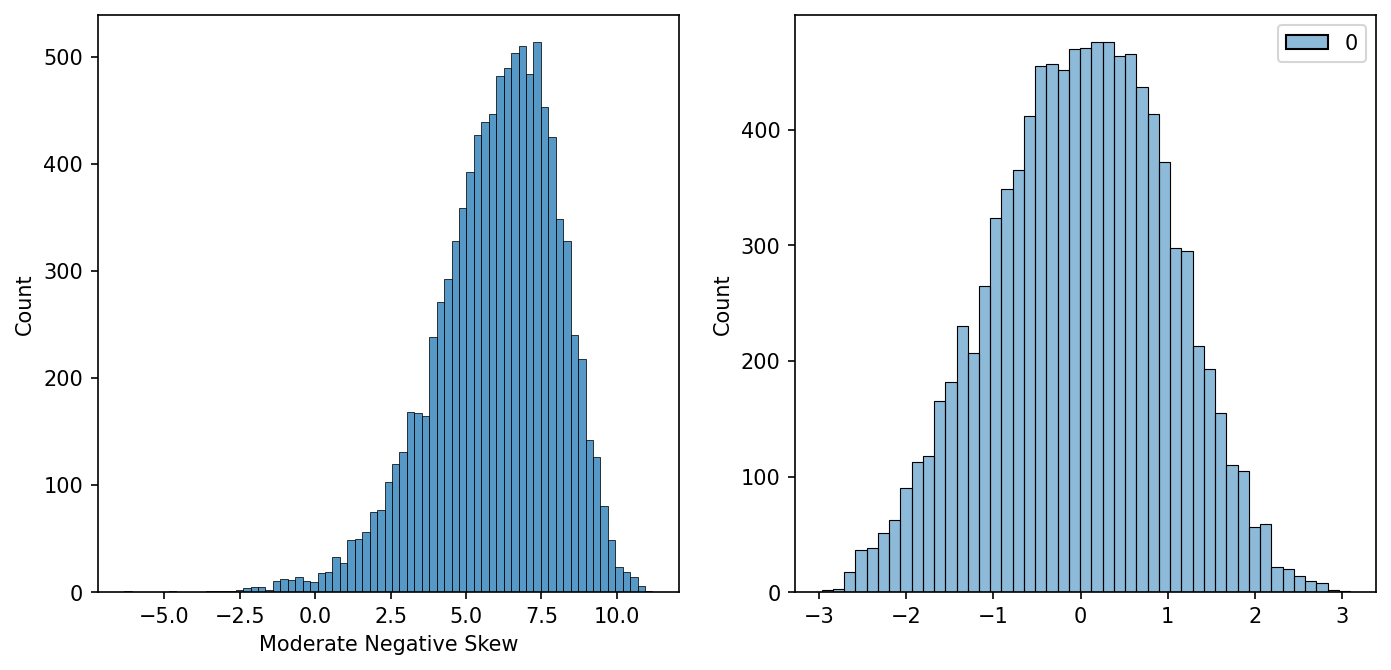

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), dpi= 150)
sns.histplot(df['Moderate Negative Skew'], ax=axes[0])
sns.histplot(data_col3, ax=axes[1])

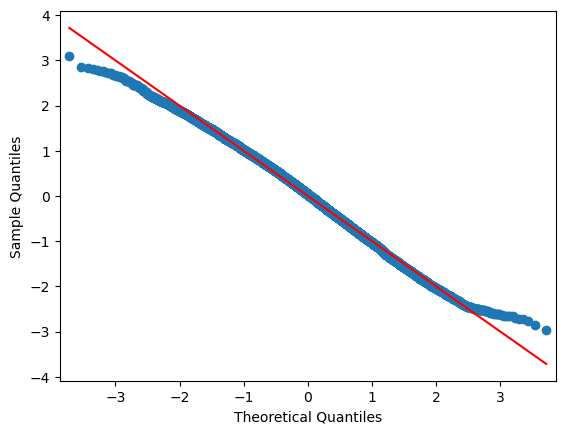

In [32]:
fig = sm.qqplot(data_col3, line='r')
plt.show()

**Highly Negative Skew:**

In [14]:
data_col4 = df['Highly Negative Skew'].values.reshape(-1, 1)
pt3 = PowerTransformer(method='yeo-johnson')
data_col4 = pt3.fit_transform(data_col4)

<Axes: ylabel='Count'>

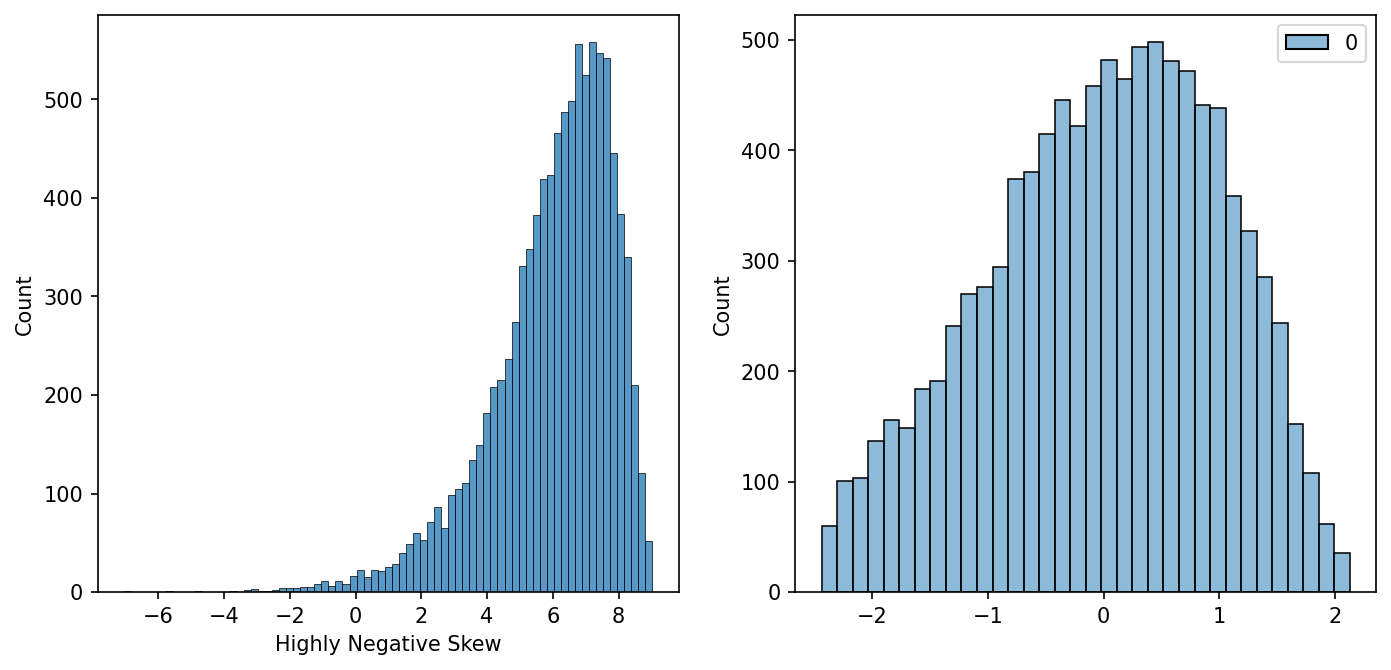

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), dpi= 150)
sns.histplot(df['Highly Negative Skew'], ax=axes[0])
sns.histplot(data_col4, ax=axes[1])

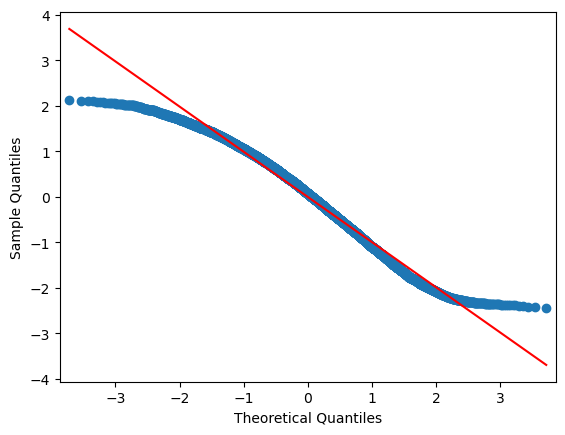

In [25]:
fig = sm.qqplot(data_col4, line='r')
plt.show()